<a href="https://colab.research.google.com/github/hsym-uec/myWeb_github/blob/main/Simmple_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# SoftBank Stock data from Stooq.com
# reference https://seanmemo.com/234/

from pandas_datareader import data
start = '2023-04-01'
end = '2023-04-25'
#6501：日立製作所
df = data.DataReader('6501.JP', 'stooq', start, end)


In [2]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-04-25,7765,7799,7667,7717,2172400
2023-04-24,7804,7871,7774,7776,2609900
2023-04-21,7689,7777,7677,7728,3456600
2023-04-20,7695,7713,7622,7683,2014400
2023-04-19,7641,7689,7620,7652,2089100
2023-04-18,7550,7629,7528,7594,2890100
2023-04-17,7530,7563,7457,7500,2904600
2023-04-14,7377,7414,7324,7407,2777800
2023-04-13,7360,7365,7294,7305,2300300


<Axes: xlabel='Date'>

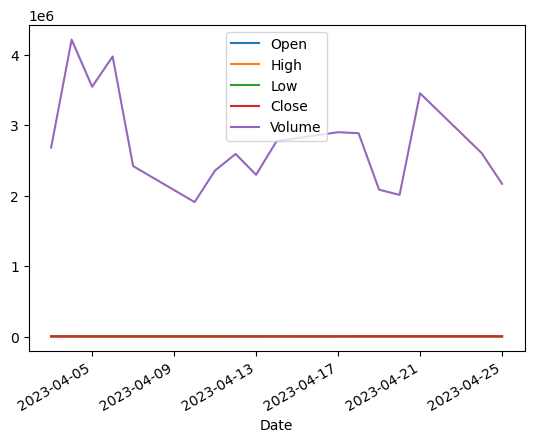

In [6]:
df.plot()

In [10]:
#https://dev.classmethod.jp/articles/pandas_datareader-mplfinance-tech/
#データのグラフ化

import mplfinance as mpf

df = df.sort_index()
mpf.plot(df, title='\nHitachi', type='candle', mav=(5, 25), volume=True, savefig='6501_JP.png')        

In [8]:
import talib as ta

df["upper"], df["middle"], df["lower"] = ta.BBANDS(df['Adj Close'], timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)

KeyError: 'Adj Close'

In [31]:
from pandas_datareader import data
import mplfinance as mpf

import tkinter as tk
import tkinter.ttk as ttk
import datetime
import time
import csv
import os
import sys
from PIL import Image
#数値を画面に出力するための関数
def draw_graph():
    #テキストボックスの内容を取得
    global number, start, end
    number2=str(number.get())
    start2 =str(start.get())
    end2   =str(end.get())
    filename = number2+'.png'
    #株式データの取得
    df = data.DataReader(number2, 'stooq', start2, end2)
    df = df.sort_index()
    #グラフの描画と保存
    mpf.plot(df, title='\n'+number2, type='candle', mav=(5, 25), volume=True, savefig=filename)
 
    #画像のサイズ取得
    img = Image.open(filename)
    width = img.width
    height = img.height
 
    #サブウィンドウの追加
    sub = tk.Toplevel()
    sub.title(number2)
    sub.geometry(str(width)+"x"+str(height))
    #グラフの描画
    graph = tk.PhotoImage(file=filename)
    canvas = tk.Canvas(sub,bg='white', width = width, height = height)
    canvas.place(x=0, y=0)
    canvas.create_image(0,0,image=graph, anchor=tk.NW)
    
# トップレベルウィンドウ作成
root = tk.Tk()

number_label = ttk.Label(
    root,
    text="num",
    width=5,
    relief=tk.SUNKEN,
)
number_label.grid(row=0, column=0, padx=20, pady=5)

start_label = ttk.Label(
    root,
    text="start",
    width=5,
    relief=tk.SUNKEN,
)
start_label.grid(row=1, column=0, padx=20, pady=5)

end_label = ttk.Label(
    root,
    text="end",
    width=5,
    relief=tk.SUNKEN,
)
end_label.grid(row=2, column=0, padx=20, pady=5)


number = tk.Entry(width=20)
number.grid(row=0, column=1, padx=10, pady=5)
start = tk.Entry(width=20)
start.grid(row=1, column=1, padx=10, pady=5)
end = tk.Entry(width=20)
end.grid(row=2, column=1, padx=10, pady=5)



draw = tk.StringVar(root)
draw.set("DRAW!")
draw_button = tk.Button(root, textvariable=draw, command=draw_graph)
draw_button.grid(row=3, column=1, padx=10, pady=5)


root.mainloop()

In [33]:
#コードと銘柄名のテーブルのダウンロード
import requests
url = "https://www.jpx.co.jp/markets/statistics-equities/misc/tvdivq0000001vg2-att/data_j.xls"
r = requests.get(url)
with open('data_j.xls', 'wb') as output:
    output.write(r.content)

,コード,銘柄名,33業種コード,33業種区分,規模コード,規模区分


In [46]:
#コードと銘柄名のみを保存
import pandas as pd
stocklist = pd.read_excel("./data_j.xls")
stocklist = stocklist.loc[:,['コード', '銘柄名']]
stocklist.to_csv("stocklist.csv")

In [ ]:
import requests
from bs4 import BeautifulSoup

url = 'https://www.nikkei.com/'
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

articles = soup.find_all('a', class_='k-card__title')
for article in articles:
    print(article.text.strip())

In [13]:
import dash
import dash_core_components as dcc
from dash import html
import plotly.express as px
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from pandas_datareader import data as web
import pandas_datareader as pdr

import seaborn as sns

sns.set(font=['Yu Gothic'])
# データ読み込み
df_pf = pd.read_csv('portfolio.csv', encoding='shift_jis', index_col=0)
df_pf

EmptyDataError: No columns to parse from file

In [12]:
import pandas
csvfile_path = './stocklist.csv'
df = pandas.read_csv(csvfile_path)
print(df)


      Unnamed: 0   コード                                   銘柄名
0              0  1301                                    極洋
1              1  1305                         ダイワ上場投信－トピックス
2              2  1306               ＮＥＸＴ　ＦＵＮＤＳ　ＴＯＰＩＸ連動型上場投信
3              3  1308                     上場インデックスファンドＴＯＰＩＸ
4              4  1309  ＮＥＸＴ　ＦＵＮＤＳ　ＣｈｉｎａＡＭＣ・中国株式・上証５０連動型上場投信
...          ...   ...                                   ...
4248        4248  9993                                  ヤマザワ
4249        4249  9994                                   やまや
4250        4250  9995                                 グローセル
4251        4251  9996                                 サトー商会
4252        4252  9997                                  ベルーナ

[4253 rows x 3 columns]


In [16]:
df_part = df[df['銘柄名'].str.contains('日立')]
print(df_part)
print(df_part['コード'].astype(str))
print(df_part['銘柄名'].astype(str))

      Unnamed: 0   コード    銘柄名
2445        2445  6305   日立建機
2573        2573  6501  日立製作所
2859        2859  7004   日立造船
2445    6305
2573    6501
2859    7004
Name: コード, dtype: object
2445     日立建機
2573    日立製作所
2859     日立造船
Name: 銘柄名, dtype: object


In [30]:
from pandas_datareader import data
import mplfinance as mpf

import tkinter as tk
import tkinter.ttk as ttk
import datetime
import time
import csv
import os
import sys
from PIL import Image
csvfile_path = './stocklist.csv'
df = pandas.read_csv(csvfile_path)

#数値を画面に出力するための関数
def search_table():
    global name, df
    name2=str(name.get())
    df_part = df[df['銘柄名'].str.contains(name2)]
    df_part_str=df_part.astype(str)
    #サブウィンドウの追加
    sub = tk.Toplevel()
    sub.title("search")
    sub.geometry("500x500")
    #グラフの描画
    search_label = ttk.Label(
        sub,
        text=df_part_str,
        width=50,
        relief=tk.SUNKEN,
    )
    search_label.grid(row=0, column=0, padx=20, pady=5)
    
    

# トップレベルウィンドウ作成
root2 = tk.Toplevel()
root2.title("search")
root2.geometry("300x200")

name_label = ttk.Label(
    root2,
    text="name",
    width=5,
    relief=tk.SUNKEN,
)
name_label.grid(row=0, column=0, padx=20, pady=5)

name = tk.Entry(root2,width=20)
name.grid(row=0, column=1, padx=10, pady=5)

get = tk.StringVar(root2)
get.set("GET!")
get_button = tk.Button(root2, textvariable=get, command=search_table)
get_button.grid(row=3, column=1, padx=10, pady=5)

root2.mainloop()

In [4]:
from pandas_datareader import data
import mplfinance as mpf
import pandas

import tkinter as tk
import tkinter.ttk as ttk
import datetime
import time
import csv
import os
import sys
from PIL import Image
#数値を画面に出力するための関数
csvfile_path = './data/stocklist.csv'
df = pandas.read_csv(csvfile_path)

def draw_graph():
    #テキストボックスの内容を取得
    global number, start, end
    number2=str(number.get())+".JP"
    start2 =str(start.get())
    end2   =str(end.get())
    filename = number2+'.png'
    #株式データの取得
    df = data.DataReader(number2, 'stooq', start2, end2)
    df = df.sort_index()
    #グラフの描画と保存
    mpf.plot(df, title='\n'+number2, type='candle', mav=(5, 25), volume=True, savefig=filename)
 
    #画像のサイズ取得
    img = Image.open(filename)
    width = img.width
    height = img.height
 
    #サブウィンドウの追加
    sub = tk.Toplevel()
    sub.title(number2)
    sub.geometry(str(width)+"x"+str(height))
    #グラフの描画
    graph = tk.PhotoImage(file=filename)
    canvas = tk.Canvas(sub,bg='white', width = width, height = height)
    canvas.place(x=0, y=0)
    canvas.create_image(0,0,image=graph, anchor=tk.NW)

#数値を画面に出力するための関数
def search_table():
    global name, df
    name2=str(name.get())
    df_part = df[df['銘柄名'].str.contains(name2)]
    df_part_str=df_part.astype(str)
    #サブウィンドウの追加
    sub = tk.Toplevel()
    sub.title("search")
    sub.geometry("500x500")
    #グラフの描画
    search_label = ttk.Label(
        sub,
        text=df_part_str,
        width=50,
        relief=tk.SUNKEN,
    )
    search_label.grid(row=0, column=0, padx=20, pady=5)

# トップレベルウィンドウ作成
root = tk.Tk()


name_label = ttk.Label(
    root,
    text="name",
    width=5,
    relief=tk.SUNKEN,
)
name_label.grid(row=0, column=0, padx=20, pady=5)

name = tk.Entry(root,width=20)
name.grid(row=0, column=1, padx=10, pady=5)

get = tk.StringVar(root)
get.set("GET!")
get_button = tk.Button(root, textvariable=get, command=search_table)
get_button.grid(row=0, column=3, padx=10, pady=5)
    

number_label = ttk.Label(
    root,
    text="num",
    width=5,
    relief=tk.SUNKEN,
)
number_label.grid(row=1, column=0, padx=20, pady=5)

start_label = ttk.Label(
    root,
    text="start",
    width=5,
    relief=tk.SUNKEN,
)
start_label.grid(row=2, column=0, padx=20, pady=5)

end_label = ttk.Label(
    root,
    text="end",
    width=5,
    relief=tk.SUNKEN,
)
end_label.grid(row=3, column=0, padx=20, pady=5)


number = tk.Entry(width=20)
number.grid(row=1, column=1, padx=10, pady=5)
start = tk.Entry(width=20)
start.grid(row=2, column=1, padx=10, pady=5)
end = tk.Entry(width=20)
end.grid(row=3, column=1, padx=10, pady=5)



draw = tk.StringVar(root)
draw.set("DRAW!")
draw_button = tk.Button(root, textvariable=draw, command=draw_graph)
draw_button.grid(row=4, column=1, padx=10, pady=5)

root.mainloop()

            Open  High   Low  Close   Volume
Date                                        
2023-05-16  7970  8077  7949   8077  2812600
2023-05-15  7880  7970  7841   7970  2049500
2023-05-12  7877  7885  7811   7848  2149800
2023-05-11  7796  7825  7762   7814  1595400
2023-05-10  7885  7890  7746   7803  2307400
2023-05-09  7879  7946  7861   7897  3487300
2023-05-08  7885  7900  7799   7812  2987900
2023-05-02  7800  7825  7706   7735  2437500
2023-05-01  7597  7780  7591   7780  3636600
2023-04-28  7380  7504  7286   7485  6828700
2023-04-27  7500  7649  7496   7646  3153800
2023-04-26  7596  7618  7510   7586  3488800
2023-04-25  7765  7799  7667   7717  2172400
2023-04-24  7804  7871  7774   7776  2609900
2023-04-21  7689  7777  7677   7728  3456600
2023-04-20  7695  7713  7622   7683  2014400
2023-04-19  7641  7689  7620   7652  2089100
2023-04-18  7550  7629  7528   7594  2890100
2023-04-17  7530  7563  7457   7500  2904600
2023-04-14  7377  7414  7324   7407  2777800
2023-04-13

<Axes: xlabel='Date'>

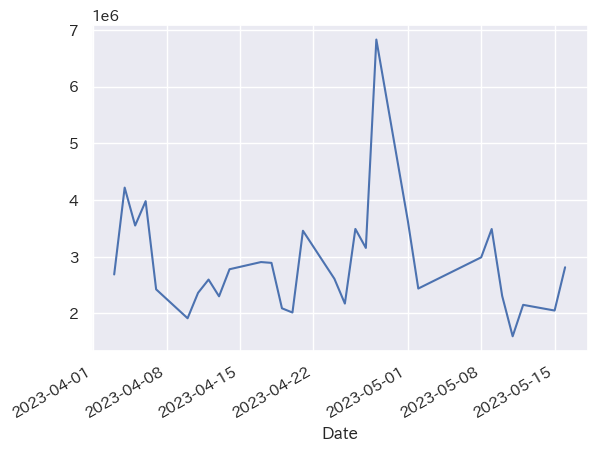

In [33]:
# SoftBank Stock data from Stooq.com
# reference https://seanmemo.com/234/
import datetime
dt = datetime.datetime.today()
from pandas_datareader import data
start = '2023-04-01'
end = dt.date()
#6501：日立製作所
df = data.DataReader('6501.JP', 'stooq', start, end)
print(df)
df['Volume'].plot()

In [36]:
import pandas as pd

import datetime
import pandas_datareader.data as web

In [38]:
df_data_j = pd.read_excel("./data/data_j.xls")

In [2]:
from pandas_datareader import data
import pandas as pd 
import numpy as np
# 株価データを取得
df = data.DataReader('7203.JP', 'stooq')
# 日付の古い順に並び替え
df.sort_index(inplace=True)

In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2018-05-23,1418.99,1421.99,1394.95,1396.45,35274040
2018-05-24,1384.43,1385.93,1350.43,1353.81,45589715
2018-05-25,1344.42,1351.93,1334.65,1336.35,32380315
2018-05-28,1336.35,1340.67,1317.56,1324.51,27340415
2018-05-29,1318.69,1323.76,1310.24,1310.24,27952170
...,...,...,...,...,...
2023-05-15,1939.50,1942.00,1926.00,1933.00,16791400
2023-05-16,1933.00,1939.50,1919.00,1923.50,18728200
2023-05-17,1925.00,1935.50,1921.00,1928.00,16295600


In [4]:
df["SMA5"] = df["Close"].rolling(window=5).mean()
df["SMA25"] = df["Close"].rolling(window=25).mean()

df.head(10)

,Open,High,Low,Close,Volume,SMA5,SMA25
Date,,,,,,,
2018-05-23,1418.99,1421.99,1394.95,1396.45,35274040,NaN,NaN
2018-05-24,1384.43,1385.93,1350.43,1353.81,45589715,NaN,NaN
2018-05-25,1344.42,1351.93,1334.65,1336.35,32380315,NaN,NaN
2018-05-28,1336.35,1340.67,1317.56,1324.51,27340415,NaN,NaN
2018-05-29,1318.69,1323.76,1310.24,1310.24,27952170,1344.272,NaN
2018-05-30,1287.70,1293.33,1281.88,1284.88,47156635,1321.958,NaN
2018-05-31,1299.72,1313.62,1298.40,1299.91,183562665,1311.178,NaN
2018-06-01,1305.36,1345.93,1303.67,1337.66,68831540,1311.440,NaN
2018-06-04,1352.12,1391.75,1350.81,1390.06,54920950,1324.550,NaN


In [3]:
from pandas_datareader import data
import pandas as pd 
import numpy as np
import datetime as dt
import mplfinance as mpf
start = '2023-01-01'
now = dt.datetime.now()
end = now.strftime('%Y-%m-%d')
# 株価データを取得
df = data.DataReader('9432.JP', 'stooq', start, end)
# 日付の古い順に並び替え
df.sort_index(inplace=True)

ModuleNotFoundError: No module named 'pandas_datareader'

In [8]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2023-01-04,3762,3795,3761,3762,5988900
2023-01-05,3785,3807,3744,3763,6020600
2023-01-06,3763,3773,3740,3741,5755400
2023-01-10,3725,3762,3696,3696,8955400
2023-01-11,3710,3742,3707,3727,4654200
...,...,...,...,...,...
2023-05-17,4169,4190,4146,4167,7217900
2023-05-18,4175,4193,4151,4155,6524400
2023-05-19,4150,4153,4112,4124,5459000


In [11]:
# MACD計算

exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = exp12 - exp26

# シグナル計算

df['Signal'] = df['MACD'].rolling(window=9).mean()
# ヒストグラム(MACD - シグナル)
df['Hist'] = df['MACD'] - df['Signal']
# MACDとシグナルのプロット作成

add_plot = [mpf.make_addplot(df['MACD'], color='m', panel=1, secondary_y=False),
            mpf.make_addplot(df['Signal'], color='c', panel=1, secondary_y=False),
            mpf.make_addplot(df['Hist'], type='bar', color='g', panel=1, secondary_y=True)]

# チャート表示

mpf.plot(df, title='\nNTT(9432)', type='candle', mav=(5, 25), volume=True, addplot=add_plot, volume_panel=2, savefig='9432_JP_MACD.png')

In [12]:
#一目均衡表 9、26、52日間のMAX、MIN値の計算

max_9 = df['High'].rolling(window=9, min_periods=1).max()
min_9 = df['Low'].rolling(window=9, min_periods=1).min()

max_26 = df['High'].rolling(window=26, min_periods=1).max()
min_26 = df['Low'].rolling(window=26, min_periods=1).min()

max_52 = df['High'].rolling(window=52).max()
min_52 = df['Low'].rolling(window=52).min()

# ５本線の計算

df['tenkan'] = (max_9 + min_9)/2
df['base'] = (max_26 + min_26)/2
df['senkou1'] = ((df['tenkan'] + df['base'])/2).iloc[:-26]
df['senkou2'] = ((max_52 + min_52)/2).iloc[:-26]
df['chikou'] = df['Close'].iloc[:-26]

# 一目均衡表のプロット作成

add_plot = [mpf.make_addplot(df['base'], color='black'),
            mpf.make_addplot(df['tenkan'], color='red'),
            mpf.make_addplot(df['chikou'], color='darkorange')
        ]

# チャート表示

mpf.plot(df, title='\nNTT(9432)', type='candle', mav=(5, 25), volume=True, addplot=add_plot, returnfig=True, fill_between=dict(y1=df['senkou1'].values, y2=df['senkou2'].values, alpha=0.5, color='gray'), volume_panel=1, savefig='9432_JP_一目均衡表.png')

(<Figure size 800x575 with 4 Axes>,
 [<Axes: ylabel='Price'>,
  <Axes: >,
  <Axes: ylabel='Volume  $10^{6}$'>,
  <Axes: >])

In [13]:
#RSI(相対力指数)
# 終値の差分

df_diff = df['Close'].diff()

# 値上がり幅と値下がり幅

df_up, df_down = df_diff.copy(), df_diff.copy()
df_up[df_up < 0] = 0
df_down[df_down > 0] = 0
df_down = df_down * -1

# 14日間の単純移動平均

sim14_up = df_up.rolling(window=14).mean()
sim14_down = df_down.rolling(window=14).mean()

# RSI

df['RSI'] = sim14_up / (sim14_up + sim14_down) * 100

# MACDとRSIのプロット作成

add_plot = [mpf.make_addplot(df['MACD'], color='m', panel=1, secondary_y=False),
            mpf.make_addplot(df['Signal'], color='c', panel=1, secondary_y=False),
            mpf.make_addplot(df['Hist'], type='bar', color='g', panel=1, secondary_y=True),
            mpf.make_addplot(df['RSI'], panel=2)]

# チャート表示

mpf.plot(df, title='\nNTT(9432)', type='candle', mav=(5, 25), volume=True, addplot=add_plot, volume_panel=3, savefig='9432_JP_RSI.png')

In [15]:
import tkinter
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from tkinter import messagebox
import os
from tkcalendar import Calendar, DateEntry
import pandas as pd
import datetime


# 出力処理
def click_exe_button():
    start = calender_date.get_date()
    end = calender_date2.get_date().split("/")
    log.insert(END, '開始日'+ str(start) + '\n')
    log.insert(END, '終了日'+'20'+end[2]+'-'+end[0]+'-'+end[1]+'\n')
    dt = datetime.datetime.now()  # UTC
    str_dt = dt.strftime('%Y/%m/%d %H:%M:%S')
    log.insert(END, '処理完了' + str_dt + '\n')


if __name__ == '__main__':
    # ウィンドウを作成
    root = tkinter.Tk()
    root.title("アプリテスト") # アプリの名前
    root.geometry("480x500") # アプリの画面サイズ

    # Frame2の作成
    frame2 = ttk.Frame(root, padding=10)
    frame2.grid()
    
    # 日付選択ボタン
    
    start = StringVar()
    start.set('開始日')
    start_label = ttk.Label(frame2, textvariable=start)
    start_label.grid(row=0, column=0)
    calender_date =DateEntry(frame2)
    calender_date.grid(row=1, column=0)
    
    end = StringVar()
    end.set('終了日')
    end_label = ttk.Label(frame2, textvariable=end)
    end_label.grid(row=0, column=2)
    calender_date2 = Calendar(frame2, date_patternstr="y-mm-dd")
    calender_date2.grid(row=1, column=2)
    
    # Frame3の作成
    frame3 = ttk.Frame(root, padding=10)
    frame3.grid()
    
    # 処理ボタンの作成
    export_button = ttk.Button(frame3, text='日付確認', command=click_exe_button, width=20)
    export_button.grid(row=0, column=1)
    
    # Frame4の作成
    frame4 = ttk.Frame(root, padding=10)
    frame4.grid()
    
    # ログ表示BOX
    log = Text(frame4,width=50, height=12,borderwidth=5,wrap='none') 
    log.grid(row=1, column=1) 
    
    # ウィンドウを動かす
    root.mainloop()

ModuleNotFoundError: No module named 'tkcalendar'

In [2]:
import tkinter
from tkcalendar import Calendar, DateEntry

class TestTkcalender(tkinter.Frame):

    def __init__(self,master):
        super().__init__(master)
        self.pack()
        self.master.title("tkカレンダーテスト")
        self.master.geometry("800x600")

        self.data_entry_date = DateEntry()
        self.data_entry_date.place(x=250, y=230)

        self.calender_date = Calendar()
        self.calender_date.place(x=500, y=230)

def main():
    root = tkinter.Tk()
    root = TestTkcalender(master=root)
    root.mainloop()

if __name__ == "__main__":
    main()

In [1]:
import tkinter
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
from tkinter import messagebox
import os
from tkcalendar import Calendar, DateEntry
import pandas as pd
import datetime


# 出力処理
def click_exe_button():
    start = calender_date.get_date()
    end = calender_date2.get_date().split("/")
    log.insert(END, '開始日'+ str(start) + '\n')
    log.insert(END, '終了日'+'20'+end[2]+'-'+end[0]+'-'+end[1]+'\n')
    dt = datetime.datetime.now()  # UTC
    str_dt = dt.strftime('%Y/%m/%d %H:%M:%S')
    log.insert(END, '処理完了' + str_dt + '\n')


if __name__ == '__main__':
    # ウィンドウを作成
    root = tkinter.Tk()
    root.title("アプリテスト") # アプリの名前
    root.geometry("480x500") # アプリの画面サイズ

    # Frame2の作成
    frame2 = ttk.Frame(root, padding=10)
    frame2.grid()
    
    # 日付選択ボタン
    
    start = StringVar()
    start.set('開始日')
    start_label = ttk.Label(frame2, textvariable=start)
    start_label.grid(row=0, column=0)
    calender_date =DateEntry(frame2)
    calender_date.grid(row=1, column=0)
    
    end = StringVar()
    end.set('終了日')
    end_label = ttk.Label(frame2, textvariable=end)
    end_label.grid(row=0, column=2)
    
    calender_date2 = Calendar(frame2, date_patternstr="y-mm-dd")
    calender_date2.grid(row=1, column=2)
    
    # Frame3の作成
    frame3 = ttk.Frame(root, padding=10)
    frame3.grid()
    
    # 処理ボタンの作成
    export_button = ttk.Button(frame3, text='日付確認', command=click_exe_button, width=20)
    export_button.grid(row=0, column=1)
    
    # Frame4の作成
    frame4 = ttk.Frame(root, padding=10)
    frame4.grid()
    
    # ログ表示BOX
    log = Text(frame4,width=50, height=12,borderwidth=5,wrap='none') 
    log.grid(row=1, column=1) 
    
    # ウィンドウを動かす
    root.mainloop()

In [7]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime

symbol = "6501.JP"  # 株式のシンボル
start_date = datetime(2023, 5, 26)  # 開始日
today = datetime.now().date()
end_date = today.strftime("%Y-%m-%d") # 終了日

df = pdr.stooq.StooqDailyReader(symbol, start=start_date, end=end_date).read()
df = df.sort_index()
print(df)
#df['Gain'] = df['Close'] - df['Close'].shift(1)
Gain = df['Close'].iloc[-1] - df['Close'].iloc[0]

stock_num = 100
fee = df['Close'].iloc[-1] * stock_num * 0.005
#print(df[['Close', 'Gain']])
print("Gain",Gain*stock_num)
print("fee",fee)
print("totalGain",Gain*stock_num - fee)


            Open  High   Low  Close   Volume
Date                                        
2023-05-26  8080  8224  8059   8181  3077300
2023-05-29  8275  8292  8113   8129  2144200
2023-05-30  8120  8182  8060   8154  1970900
2023-05-31  8134  8134  8005   8046  8499600
2023-06-01  8030  8102  7999   8037  2452800
2023-06-02  8100  8311  8062   8297  3210900
2023-06-05  8447  8556  8424   8553  3550200
2023-06-06  8495  8628  8458   8616  2494000
2023-06-07  8678  8719  8452   8503  3474400
2023-06-08  8555  8598  8411   8475  2764600
2023-06-09  8625  8688  8535   8666  4257700
2023-06-12  8709  8720  8625   8684  2561500
2023-06-13  8699  8797  8655   8737  3280000
Gain 55600
fee 4368.5
totalGain 51231.5


In [23]:
import pandas as pd
import pandas_datareader as pdr

# 株式コードのリストが格納されたCSVファイルのパス
csv_file = './stocks.csv'

# 結果を格納する空のリスト
stock_data = []

# CSVファイルから株式コードを読み込む
with open(csv_file, 'r') as file:
    stock_codes = file.readlines()

# 株式コードを1つずつ処理する
for code in stock_codes:
    code = code.strip()  # 改行文字を削除

    try:
        # stooqから株式データを取得
        df = pdr.stooq.StooqDailyReader(code).read()

        # 結果を格納するディクショナリを作成し、データを追加
        stock_info = {
            'Code': code,
            'Data': df
        }
        
        # 株式データをリストに追加
        stock_data.append(stock_info)

        print(f"Stock data for {code} successfully retrieved.")
    except Exception as e:
        print(f"Error retrieving stock data for {code}: {str(e)}")

# 株式データが格納されたリストを表示
for stock in stock_data:
    print(f"Stock code: {stock['Code']}")
    print(stock['Data'])
    print()


Stock data for 6501 successfully retrieved.
Stock data for 6758 successfully retrieved.
Stock data for 9432 successfully retrieved.
Stock data for 7203 successfully retrieved.
Stock data for 9020 successfully retrieved.
Stock data for 9201 successfully retrieved.
Stock data for 1925 successfully retrieved.
Stock data for 4452 successfully retrieved.
Stock data for 8001 successfully retrieved.
Stock data for 4568 successfully retrieved.
Stock data for 2502 successfully retrieved.
Stock data for 4901 successfully retrieved.
Stock code: 6501
Empty DataFrame
Columns: []
Index: []

Stock code: 6758
Empty DataFrame
Columns: []
Index: []

Stock code: 9432
Empty DataFrame
Columns: []
Index: []

Stock code: 7203
Empty DataFrame
Columns: []
Index: []

Stock code: 9020
Empty DataFrame
Columns: []
Index: []

Stock code: 9201
Empty DataFrame
Columns: []
Index: []

Stock code: 1925
Empty DataFrame
Columns: []
Index: []

Stock code: 4452
Empty DataFrame
Columns: []
Index: []

Stock code: 8001
Empty D

In [6]:
import pandas as pd
from datetime import datetime
import pandas_datareader as pdr

# CSVファイルのパス
csv_path = "codesData.csv"

# CSVファイルをDataFrameとして読み込む
data = pd.read_csv(csv_path)

# 購入日の日付をdatetime型に変換
data['date'] = pd.to_datetime(data['date'])

# Gain-Lossを計算するためのリストを初期化
gain_loss_list = []

# 株価情報を取得してGain-Lossを計算
for index, row in data.iterrows():
    stock_code = row['code']
    purchase_date = row['date']

    # stooqを使用して株価情報を取得
    start_date = purchase_date.strftime("%Y-%m-%d")
    end_date = datetime.today().strftime("%Y-%m-%d")
    df = pdr.stooq.StooqDailyReader(str(stock_code)+".JP", start_date, end_date).read()
    df = df.sort_index()
    # Gain-Lossを計算
    purchase_price = df.iloc[0]['Close']
    current_price = df.iloc[-1]['Close']
    gain_loss = (current_price - purchase_price) * row['num']
    fee = (current_price*row['num']*0.005 + purchase_price*row['num']*0.005)*1.1
    # Gain-Lossをリストに追加
    gain_loss_list.append((stock_code, gain_loss-fee))

# 結果を表示
for stock_code, gain_loss in gain_loss_list:
    print(f"株式コード: {stock_code}, Gain-Loss: {gain_loss}")


株式コード: 1925, Gain-Loss: 11596.0
株式コード: 4452, Gain-Loss: -28398.0
株式コード: 6501, Gain-Loss: 46295.1
株式コード: 6758, Gain-Loss: 40493.25
株式コード: 7203, Gain-Loss: 21389.225
株式コード: 9020, Gain-Loss: -18774.5
株式コード: 9202, Gain-Loss: 10364.599999999999
株式コード: 9432, Gain-Loss: -2606.800000000001
株式コード: 8001, Gain-Loss: 29553.5
株式コード: 4568, Gain-Loss: 32145.1
株式コード: 2502, Gain-Loss: 15762.55
株式コード: 4901, Gain-Loss: -1031.6000000000004


In [9]:
from tkinter import *
import tkinter.ttk as ttk
import tkinter.filedialog as filedialog

class FileOpenFrame(ttk.Frame):
    """
    ファイルの読み込み用フレーム
    """
    def __init__(self, master,file_entry_width=100):
        super().__init__(master)
        self.filePath = StringVar()
        self.createWidget(file_entry_width)
        self.pack()

    def createWidget(self,entry_width):
        filePathLabel = ttk.Label(self,text="FilePath")
        filePathLabel.grid(column=0,row=0)
        filepathEntry = ttk.Entry(self,textvariable=self.filePath,widt=entry_width)
        filepathEntry.grid(column=1,row=0)
        filepathButton = ttk.Button(self,text="open",command=self.openFileDialog)
        filepathButton.grid(column=2,row=0)
        self.readButton = ttk.Button(self,text="read")
        self.readButton.grid(column=3,row=0)

    def openFileDialog(self):
        """
        ファイルダイアログを開く
        """
        file  = filedialog.askopenfilename(filetypes=[("csv", "*.csv")]);
        self.filePath.set(file)

    def getFilePath(self):
        return self.filePath.get()

    def setReadButtonCommand(self,func):
        """
        読み込みを押したときのコマンドを指定する
        """
        self.readButton["command"] = func


class TreeView(ttk.Frame):
    """
    csvのデータを実際に表示するTreeview
    """
    def __init__(self,master):
        super().__init__(master)
        self.tree = None
        self.selected_iid = None
        self.columns =[]
        self.createWidget()
        self.pack()
        self.setSampleData()
    def createWidget(self):
        """
        icon列は不要なのでshow="headings"を指定
        """
        self.tree = ttk.Treeview(self)
        self.tree["show"] = "headings"
        self.tree.pack()

    def setColomns(self,columns):
        """
        テーブルの列名を指定
        """
        self.columns = columns
        self.tree["columns"] = self.columns
        for col in columns:
            self.tree.heading(col,text=col)

    def setRow(self,index ="" ,row_data=[]):
        """
        新規レコードの挿入
        """
        self.tree.insert("",index="end",text=index,values = row_data)

    def setRows(self,rows_data):
        """
        複数の新規レコードの挿入
        """
        for i,row_data in enumerate(rows_data):
            self.setRow(index = i,row_data = row_data)

    def setSampleData(self):
        """
        起動時のサンプルデータ
        """
        column_data = ("Name","Value")
        rows_data = [("None","None")]
        self.deleteRows()
        self.setColomns(column_data)
        self.setRows(rows_data)

    def deleteRows(self):
        """
        レコードの全削除
        """
        children = self.tree.get_children("")
        for child in children:
            self.tree.delete(child)

    def addSelectAction(self,func):
        """
        レコードが選択されたときに呼ばれるイベントを登録
        """
        self.tree.bind("<<TreeviewSelect>>",func)
    def getItem(self):
        """
        現在選択状態のレコードの取得
        """
        self.selcted_iid = self.tree.focus()
        return self.tree.item(self.selcted_iid,"values")
    def getRows(self):
        """
        全レコードの取得
        """
        rows =[]
        children = self.tree.get_children("")
        for child in children:
            item = self.tree.item(child,"values")
            rows.append(item)
        return rows

    def getColumn(self):
        """
        列名の取得
        """
        return self.columns

    def getDataMap(self):
        """
        現在選択されているレコードの
        列名と値のマップを取得
        """
        item = self.getItem()
        if len(self.columns) != len(item):
            return {"none":"none"}
        else:
            data_map = {}
            for i,column in enumerate(self.columns):
                data_map[column] = item[i]
            return data_map

    def updateValue(self,iid,new_values):
        """
        値の更新
        """
        self.tree.item(self.iid,values=new_values)
    def updateValue(self,new_values):
        """
        現在選択されているレコードの値の更新
        """
        self.tree.item(self.selcted_iid,values=new_values)
    def update(self,value_dict):
        """
        マップからリストに変更後
        値の更新
        """
        data =[]
        for column in self.columns:
            data.append(value_dict[column])
        self.updateValue(data)

    def insert(self,value_dict):
        """
        マップからリストに変更後
        新規レコードの挿入
        """
        data =[]
        for column in self.columns:
            data.append(value_dict[column])
        children = self.tree.get_children("")
        index = len(children)
        self.setRow(index = str(index), row_data=data)

class LabelEntryWidget(ttk.Frame):
    """
    LabelとEntryがくっついたWidget
    """
    def __init__(self, master,text="property"):
        super().__init__(master)
        self.value = StringVar()
        self.createWidgets(text)

    def createWidgets(self,text="property"):
        self.label = ttk.Label(self,text=text)
        self.label.pack(side="left")
        self.entry = ttk.Entry(self,textvariable=self.value)
        self.entry.pack(side="left")

    def getVar(self):
        """
        値を取得するためのWidget変数の取得
        """
        return self.value


    def setLabelOption(self,key_dict):
        """
        Labelのオプション指定(オプションはdictで渡す)
        """
        for k in key_dict.keys():
            self.label[k] = key_dict[k]


    def setEntryOption(self,key_dict):
        """
        Entryのオプション指定(オプションはdictで渡す)
        """
        for k in key_dict.keys():
            self.entry[k] = key_dict[k]


class PropertyView(ttk.Frame):
    """
    選択されたレコードの内容を修正、
    新規レコードなどを挿入するフレーム
    """
    def __init__(self,master):
        super().__init__(master)
        self.pack()
        self.param_dict={}

    def createWidget(self,columns):
        """
        列の要素数分入力ボックスの作成
        """
        self.delete()
        self.param_dict ={}
        for column in columns:
            option = {"width":10}
            param = LabelEntryWidget(self,text = column)
            param.setLabelOption(option)
            param.pack()
            self.param_dict[column] = param.getVar()
        self.createInsertUpdateButton()
        self.createSaveButton()

    def createInsertUpdateButton(self):
        """
        更新ボタンと挿入ボタンを作成
        """
        button_frame = ttk.Frame(self)
        button_frame.pack(anchor="e")
        self.update_button = update = ttk.Button(button_frame,text = "commit")
        self.insert_button = insert = ttk.Button(button_frame,text = "insert")
        update.pack(side="left")
        insert.pack(side="left")

    def createSaveButton(self):
        """
        保存ボタンを作成
        """
        save_frame = ttk.Frame(self)
        save_frame.pack(anchor="e")
        self.save_button = save = ttk.Button(save_frame,text = "Save")
        save.pack(side="left")

    def delete(self):
        """
        更新時用
        自身のフレームに紐づく子Widgetの削除
        """
        children = self.winfo_children()
        for child in children:
            child.destroy()

    def setUpdateButtonCommand(self,command):
        self.update_button["command"] = command

    def setInsertButtonCommand(self,command):
        self.insert_button["command"] = command

    def setSaveButtonCommand(self,command):
        self.save_button["command"] = command

    def setParameter(self,param):
        """
        取得したレコードデータを各入力ボックスのWidget変数に振り分け
        """
        for key in self.param_dict.keys():
            self.param_dict[key].set(param[key])

    def getParameter(self):
        """
        列名とWidget変数の値をマップにして返す
        """
        param_dict = {}
        for key,value in self.param_dict.items():
            param_dict[key] = value.get()
        return param_dict


class CSVView(ttk.Frame):
    """
    CsvViewerのメインView

    """
    def __init__(self, master):
        super().__init__(master,borderwidth=10)
        self.tree = None
        self.createWidget()
        self.setAction()
        self.pack()

    def createWidget(self):
        """
        viewの組み立て
        """
        self.createUpperFrame()
        self.createLowerFrame()

    def createUpperFrame(self):
        """
        Csv読み込み用フレーム
        """
        upper_frame = ttk.Frame(self)
        upper_frame.pack()
        self.file_path_frame = FileOpenFrame(upper_frame)

    def createLowerFrame(self):
        """
        Treeviewとレコード編集Widget用フレーム
        """
        lower_frame = ttk.Frame(self)
        lower_frame.pack()
        left_frame = ttk.LabelFrame(lower_frame,text="CsvData")
        left_frame.pack(side="left")
        self.tree = TreeView(left_frame)
        right_frame = ttk.LabelFrame(lower_frame,text="RowData")
        right_frame.pack(side = "right",anchor="n")

        self.property = PropertyView(right_frame)
        self.property.createWidget(self.tree.getColumn())


    def setAction(self):
        """
        ツリーアイテム選択アクションの登録
        """
        def _updateCommand():
            """
            更新アクション
            """
            param = self.property.getParameter()
            print(param)
            self.tree.update(param)
        def _insertCommand():
            """
            挿入アクション
            """
            param = self.property.getParameter()
            self.tree.insert(param)

        def _func(event):
            """
            レコード選択アクション
            レコード選択ごとに更新インサートコマンドを登録しなおす
            """
            self.property.setParameter(self.tree.getDataMap())
            self.property.setUpdateButtonCommand(_updateCommand)
            self.property.setInsertButtonCommand(_insertCommand)

        self.tree.addSelectAction(_func)

    def getFilePath(self):
        """
        ファイルパスの取得
        """
        return self.file_path_frame.getFilePath()
    def setReadButtonCommand(self,func):
        """
        読み込みボタンコマンド登録
        """
        self.file_path_frame.setReadButtonCommand(func)
    def setNewColumnAndData(self,columns,rows):
        """
        新しい列名とレコードを設定する。
        プロパティのWidgetも更新する。
        """
        self.tree.deleteRows()
        self.tree.setColomns(columns)
        self.tree.setRows(rows)
        self.property.createWidget(self.tree.getColumn())

    def setSaveButtonCommand(self,func):
        """
        保存ボタンコマンド登録
        """
        self.property.setSaveButtonCommand(func)
    def getColumns(self):
        """
        列名リスト取得
        """
        return self.tree.getColumn()
    def getRows(self):
        """
        レコードリスト取得
        """
        return self.tree.getRows()

if __name__ == '__main__':
    master = Tk()
    master.title("csvview")
    CSVView(master)
    master.geometry("800x400")
    master.mainloop()

In [7]:
import csv
import tkinter.messagebox as messagebox
from tkinter import *
import tkinter.ttk as ttk
from csvview import CSVView
import os

class CSVLogic:
    """
    csvViewer読み込み、書き込みロジック
    """

    def __init__(self):
        """
        列とレコード用の配列を初期化
        """
        self.header =[]
        self.data =[]

    def readCsv(self,data_path):
        """
        csvを読み込んで内部にデータを反映する
        1行目を列名、他の行をデータとして取得する
        """
        ret = True
        header = []
        data =[]
        try :
            with open(data_path, "r",newline="") as csv_file:
                f = csv.reader(csv_file, delimiter=",", doublequote=True, lineterminator="\n", quotechar='"', skipinitialspace=True)
                header = next(f)
                print(header)
                for row in f:
                    data.append(row)
        except IOError as e:
            print(e)
            ret = False
        self.header = header
        self.data = data
        return ret

    def writeCsv(self,data_path,columns,rows):
        """
        与えられた列名リストとレコードリストを書きだす
        """
        ret = True
        csv_file = open(data_path, "w",newline="")
        try:
            with open(data_path, 'w') as csv_file:
                writer = csv.writer(csv_file, lineterminator='\n')
                writer.writerow(columns)
                writer.writerows(rows)
        except IOError as e:
            print(e)
            ret = False
        return ret
    def getHeader(self):
        return self.header
    def getData(self):
        return self.data


class CSVControl:
    """
    csvViewerのコントローラー
    """

    def __init__(self):
        """
        アプリの立ち上げとイベント登録
        """
        master = Tk()
        master.title("CsvViewer")
        master.geometry("1000x400")
        self.view = CSVView(master)
        self.logic = CSVLogic()
        self.view.setReadButtonCommand(self.readButtonCommand)
        master.mainloop()

    def readButtonCommand(self):
        """
        csv読み込みボタン用コマンド
        csvから取得した列名、データをViewに反映する。
        csvが変更されるごとにRowDataフレームがリロードされるので、
        保存ボタンコマンドも再設定
        """

        columns,datas = self.readCsv()
        self.view.setNewColumnAndData(columns,datas)
        self.view.setSaveButtonCommand(self.saveButtonCommand)

    def saveButtonCommand(self):
        """
        保存ボタン用コマンド
        指定されたパスにviewで指定された情報をcsv形式で書きだす
        """
        file_path = self.view.getFilePath()
        columns = self.view.getColumns()
        rows =self.view.getRows()
        ret = self.logic.writeCsv(file_path,columns,rows)
        if ret:
            messagebox.showinfo("writecsv","succeed")
        else:
            messagebox.showerror("writecsv","failed")

    def readCsv(self):
        """
        csv読み込んで列名とデータを返却
        """
        ret = False;
        file_path = self.view.getFilePath()
        if os.path.exists(file_path) :
            ret = self.logic.readCsv(file_path)
        if ret:
            messagebox.showinfo("readcsv","succeed")
        else:
            messagebox.showerror("readcsv","failed")
        return self.logic.getHeader(),self.logic.getData()

if __name__ == '__main__':
    control =  CSVControl()
    # control.readCsv()

2023-06-14 10:32:29.168 python[4921:40830] +[CATransaction synchronize] called within transaction
2023-06-14 10:32:52.213 python[4921:40830] +[CATransaction synchronize] called within transaction


{'Name': 'test', 'Value': '100'}
{'Name': 'test', 'Value': '1000'}


In [12]:
import PySimpleGUI as sg
 
layout = [
   [sg.Text("ファイル"), sg.InputText(), sg.FileBrowse('ファイル選択', key="inputFilePath")],
   [sg.Button('DB登録')],
   [sg.Text(" ↓↓DBに登録した内容を表示:")],
   [sg.Multiline(default_text='', size=(60,10), border_width=2, key='tb1')],
   [sg.Button('クリア')]
]
 
window = sg.Window("ファイル読込", layout)
 
# イベントループ
while True:
    event, values = window.read()                                                                                                                       
    if event == sg.WIN_CLOSED:                                                                                                                      
        break                                                                                                                                                              
    elif event == 'DB登録':
        # 処理の内容を記載
        sg.popup('処理内容の実装前')     
 
    elif event == ' クリア':
        # 処理の内容を記載
         window['tb1'].Update('')
 
window.close()

2023-06-20 15:44:32.776 python[1460:17727] +[CATransaction synchronize] called within transaction


In [6]:
import sqlite3
 
dbname = 'Household.db'
conn = sqlite3.connect(dbname)
cur = conn.cursor()
 
#テーブルを作成
cur.execute(‘CREATE TABLE HouseholdAccount(
AccountDate DATETIME NOT NULL,  ExpenseItem VARCHAR(50) NOT NULL,
    Memo VARCHAR(50), DepositAmount INTEGER(7), WithdrawalAmount INTEGER(7)
)’)
 
# " HouseholdAccount "にデータを入れる
cur.execute(‘INSERT INTO HouseholdAccount(
AccountDate, ExpenseItem, Memo, DepositAmount, WithdrawalAmount) VALUES(“2022/5/28”,”食費”,”外食費”,0,2500),(“2022/5/28”,”交通費”,”電子マネーチャージ”,0,1000); ‘)
 
conn.commit()
 
cur.close()
conn.close()

SyntaxError: invalid character '‘' (U+2018) (4009655785.py, line 8)

In [10]:
import sqlite3
import pandas as pd
# pandasでcsvファイルの内容を読み込む
# csvファイルの、1列目にAccountDate, 2列目にExpenseItem, 3列目にMemo, 4列目にDepositAmount, 5列目にWithdrawalAmountが入っているとする
df = pd.read_csv('codesData.csv', encoding='SHIFT_JIS')
dbname = 'Household.db'
conn = sqlite3.connect(dbname)
cur = conn.cursor()
 
# 名前がHouseholdのDBに、読み込んだcsvファイルのデータをSQLに書き込む
df.to_sql('HouseholdAccount', conn, if_exists='replace', index = None)
 
conn.commit()
# 作成したデータベースを1行ずつ見る
select_sql = 'SELECT * FROM HouseholdAccount'
for row in cur.execute(select_sql):
    print(row)
 
cur.close()
conn.close()

(1925, 100, '2023-05-26')
(4452, 200, '2023-05-26')
(7203, 100, '2023-05-26')
(9020, 200, '2023-05-26')
(9202, 200, '2023-05-26')
(9432, 200, '2023-05-26')
(2502, 100, '2023-06-07')
(4901, 100, '2023-06-07')
(5108, 100, '2023-06-14')
(5401, 100, '2023-06-14')
(6273, 100, '2023-06-14')
(9983, 100, '2023-06-14')


In [1]:
import tkinter as tk
from tkinter import filedialog
import csv
import sqlite3

def browse_file():
    # ファイルダイアログを表示してCSVファイルを選択
    file_path = filedialog.askopenfilename(filetypes=[('CSV Files', '*.csv')])
    if file_path:
        # 選択したCSVファイルを読み込んでデータベースに登録
        with open(file_path, 'r') as file:
            csv_data = csv.reader(file)
            for row in csv_data:
                c.execute('INSERT INTO my_table (name, age, email) VALUES (?, ?, ?)', row)
            conn.commit()
            print("データベースに登録しました。")

def load_data():
    # データベースから情報を読み込んで表示
    c.execute('SELECT * FROM my_table')
    data = c.fetchall()
    for row in data:
        listbox.insert(tk.END, row)

# データベースの接続とテーブルの作成
conn = sqlite3.connect('database.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS my_table (
                id INTEGER PRIMARY KEY,
                code INTEGER,
                num INTEGER,
                date TEXT)''')
conn.commit()

# GUIアプリケーションの作成
root = tk.Tk()
root.title("CSVファイルをデータベースに登録")

# ボタンを配置
browse_button = tk.Button(root, text="CSVファイルを選択", command=browse_file)
browse_button.pack(pady=10)

# リストボックスを配置
listbox = tk.Listbox(root)
listbox.pack(pady=10)

# データ読み込みボタンを配置
load_button = tk.Button(root, text="データを読み込む", command=load_data)
load_button.pack(pady=10)

# アプリケーションの実行
root.mainloop()

# データベースの接続をクローズ
conn.close()


2023-06-25 15:53:02.552 python[2354:124804] +[CATransaction synchronize] called within transaction


データベースに登録しました。


In [1]:
import csv
import sqlite3

def csv_to_sqlite(csv_file, db_file):
    # CSVファイルを読み込み、データをリストに格納する
    with open(csv_file, 'r') as file:
        csv_data = list(csv.reader(file))
    
    # SQLiteデータベースに接続する
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # テーブルが存在しない場合は作成する
    cursor.execute("CREATE TABLE IF NOT EXISTS data (column1, column2, column3)")
    
    # データをテーブルに挿入する
    for row in csv_data:
        cursor.execute("INSERT INTO data VALUES (?, ?, ?)", row)

    # 変更を保存し、接続を閉じる
    conn.commit()
    conn.close()
    
    print("CSVファイルの内容がSQLiteデータベースに追加されました。")

def delete_from_sqlite(db_file, condition):
    # SQLiteデータベースに接続する
    conn = sqlite3.connect(db_file)
    cursor = conn.cursor()

    # テーブルからデータを削除する
    cursor.execute("DELETE FROM data WHERE " + condition)

    # 変更を保存し、接続を閉じる
    conn.commit()
    conn.close()
    
    print("データが削除されました。")

# プログラムの実行例
csv_file_name = "example.csv"
db_file_name = "example.db"

# CSVファイルの内容をSQLiteデータベースに追加
csv_to_sqlite(csv_file_name, db_file_name)

# 条件に基づいてデータを削除
delete_from_sqlite(db_file_name, "column1 = 'Value'")


CSVファイルの内容がSQLiteデータベースに追加されました。
データが削除されました。


In [2]:
import tkinter as tk
from tkinter import messagebox
import csv
import sqlite3

def connect_db(db_name):
    conn = sqlite3.connect(db_name)
    cur = conn.cursor()
    return conn, cur

def load_csv_into_db(csv_file, db_name, table_name):
    conn, cur = connect_db(db_name)
    with open(csv_file, 'r') as fin:
        dr = csv.DictReader(fin)
        to_db = [(i['col1'], i['col2']) for i in dr]  # CSV file の column 名を変更してください

    cur.executemany(f"INSERT INTO {table_name} (col1, col2) VALUES (?, ?);", to_db)
    conn.commit()
    conn.close()

def view_data(db_name, table_name):
    conn, cur = connect_db(db_name)
    cur.execute(f"SELECT * FROM {table_name}")
    rows = cur.fetchall()
    conn.close()
    return rows

def delete_data(db_name, table_name, id):
    conn, cur = connect_db(db_name)
    cur.execute(f"DELETE FROM {table_name} WHERE id=?", (id,))
    conn.commit()
    conn.close()

def insert_data(db_name, table_name, data):
    conn, cur = connect_db(db_name)
    columns = ', '.join(data.keys())
    placeholders = ', '.join('?' * len(data))
    sql = f"INSERT INTO {table_name} ({columns}) VALUES ({placeholders})"
    cur.execute(sql, list(data.values()))
    conn.commit()
    conn.close()


class DatabaseApp:
    def __init__(self, window, db_name="mydb.db", table_name="mytable"):
        self.window = window
        self.window.title("Database App")
        self.db_name = db_name
        self.table_name = table_name

        self.display_text = tk.StringVar()
        self.id_to_delete = tk.StringVar()

        self.load_button = tk.Button(window, text="Load CSV", command=self.load_csv)
        self.load_button.pack()

        self.view_button = tk.Button(window, text="View Data", command=self.view_data)
        self.view_button.pack()

        self.delete_button = tk.Button(window, text="Delete Data", command=self.delete_data)
        self.delete_button.pack()

        self.delete_entry = tk.Entry(window, textvariable=self.id_to_delete)
        self.delete_entry.pack()

        self.data_label = tk.Label(window, textvariable=self.display_text)
        self.data_label.pack()

    def load_csv(self):
        load_csv_into_db("mydata.csv", self.db_name, self.table_name)
        self.display_text.set("CSV Loaded.")

    def view_data(self):
        data = view_data(self.db_name, self.table_name)
        formatted_data = "\n".join([str(d) for d in data])
        self.display_text.set(formatted_data)

    def delete_data(self):
        id = self.id_to_delete.get()
        delete_data(self.db_name, self.table_name, id)
        self.display_text.set(f"Data with ID {id} deleted.")

def run_app():
    window = tk.Tk()
    DatabaseApp(window)
    window.mainloop()

In [1]:
import tkinter as tk
from tkinter import messagebox
import csv
import sqlite3
def connect_db(db_name):
    conn = sqlite3.connect(db_name)
    cur = conn.cursor()
    return conn, cur

def load_csv_into_db(csv_file, db_name, table_name):
    conn, cur = connect_db(db_name)
    with open(csv_file, 'r') as fin:
        dr = csv.DictReader(fin)
        to_db = [(i['col1'], i['col2']) for i in dr]  # CSV file の column 名を変更してください

    cur.executemany(f"INSERT INTO {table_name} (col1, col2) VALUES (?, ?);", to_db)
    conn.commit()
    conn.close()

class DatabaseApp:
    def __init__(self, window, db_name="mydb.db", table_name="mytable"):
        self.window = window
        self.window.title("Database App")
        self.db_name = db_name
        self.table_name = table_name

        self.display_text = tk.StringVar()
        self.id_to_delete = tk.StringVar()

        self.load_button = tk.Button(window, text="Load CSV", command=self.load_csv)
        self.load_button.pack()

        self.view_button = tk.Button(window, text="View Data", command=self.view_data)
        self.view_button.pack()

        self.delete_button = tk.Button(window, text="Delete Data", command=self.delete_data)
        self.delete_button.pack()

        self.delete_entry = tk.Entry(window, textvariable=self.id_to_delete)
        self.delete_entry.pack()

        self.data_label = tk.Label(window, textvariable=self.display_text)
        self.data_label.pack()

    def load_csv(self):
        load_csv_into_db("mydata.csv", self.db_name, self.table_name)
        self.display_text.set("CSV Loaded.")

    def view_data(self):
        data = view_data(self.db_name, self.table_name)
        formatted_data = "\n".join([str(d) for d in data])
        self.display_text.set(formatted_data)

    def delete_data(self):
        id = self.id_to_delete.get()
        delete_data(self.db_name, self.table_name, id)
        self.display_text.set(f"Data with ID {id} deleted.")

def run_app():
    window = tk.Tk()
    DatabaseApp(window)
    window.mainloop()

run_app()